<a href="https://colab.research.google.com/github/zhaocaiQ/machine_learning_study/blob/master/%ED%8C%8C%EC%9D%B4%ED%84%B0%EC%B9%98_RNN%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## https://www.youtube.com/watch?v=izQZNWpOrGU

# 파이토치 RNN 분류모델
* 코드출처: https://tutorials.pytorch.kr/intermediate/char_rnn_classification_tutorial.html

# 이름을 입력했을 때 그 이름이 어느나라 이름인지 예측하는 분류모델

In [1]:
# 세계 각국 이름(성)데이터 불러오기
!wget https://download.pytorch.org/tutorial/data.zip
!unzip data.zip

--2021-12-04 08:48:18--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 18.66.180.62, 18.66.180.45, 18.66.180.39, ...
Connecting to download.pytorch.org (download.pytorch.org)|18.66.180.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   2.75M  --.-KB/s    in 0.1s    

2021-12-04 08:48:19 (25.6 MB/s) - ‘data.zip’ saved [2882130/2882130]

Archive:  data.zip
   creating: data/
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italia

### io, glob 라이브러리 정보
* glob: https://wikidocs.net/83

In [2]:
from io import open
import glob
import os

# 해당폴더에 txt된 파일 모두 불러오는 함수
def findFiles(path):
  return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# 러시아나 그런 언어의 특수문자를 제거하여 저장하는 함수.
def unicodeToAscii(s):
  return ''.join(
      c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mn' and c in all_letters
  )

print(unicodeToAscii('Ślusàrski'))

category_lines = {}
all_categories = []

def readLines(filename):
  lines = open(filename, encoding='utf-8').read().strip().split('\n')
  return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
  category = os.path.splitext(os.path.basename(filename))[0]
  all_categories.append(category)
  lines = readLines(filename)
  category_lines[category] = lines

n_categories = len(all_categories)

['data/names/Korean.txt', 'data/names/Vietnamese.txt', 'data/names/Czech.txt', 'data/names/German.txt', 'data/names/Arabic.txt', 'data/names/French.txt', 'data/names/Greek.txt', 'data/names/Chinese.txt', 'data/names/Russian.txt', 'data/names/Scottish.txt', 'data/names/Italian.txt', 'data/names/Portuguese.txt', 'data/names/Spanish.txt', 'data/names/Polish.txt', 'data/names/Dutch.txt', 'data/names/English.txt', 'data/names/Irish.txt', 'data/names/Japanese.txt']
Slusarski


In [41]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [10]:
import torch

# all_letters에서 letter(매개변수)값을 받아 find()함수를 이용해
# 해당 letter이 몇번째 인덱스에 있는지 값 찾음.
def letterToIndex(letter):
  return all_letters.find(letter)

# 한개의 텐서(정보)에 대해서만 1로 변경
def letterToTensor(letter):
  tensor = torch.zeros(1, n_letters)
  tensor[0][letterToIndex(letter)] = 1
  return tensor

# 문장(라인) 전체를 텐서로 변경
def lineToTensor(line):
  tensor = torch.zeros(len(line), 1, n_letters)
  for li, letter in enumerate(line):
    tensor[li][0][letterToIndex(letter)] = 1
  return tensor

print('J에 대한 tensor:', letterToTensor('J'))
print('J에 대한 tensor_size:',letterToTensor('J').size())
print('Jones에 대한 tensor:', lineToTensor('Jones'))
print('Jones에 대한 tensor_size:',lineToTensor('Jones').size())

J에 대한 tensor: tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
J에 대한 tensor_size: torch.Size([1, 57])
Jones에 대한 tensor: tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0

# 신경망 생성

In [49]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [50]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

In [43]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.2231, -2.5186, -2.6544, -2.5188, -2.8674, -2.8013, -4.0813, -2.7342,
         -2.9611, -3.0091, -3.5490, -3.5529, -3.2052, -3.2650, -2.8957, -2.4933,
         -2.9299, -3.4325]], grad_fn=<LogSoftmaxBackward0>)


# 모델학습
* 준비

In [51]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1) #output 값중 가장 큰 값 1개의 값과 주소를 가져옴.
    category_i = top_i[0].item()     # 텐서에서 정수 값으로 변경
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Irish', 16)


In [53]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
  #랜덤으로 값 가져오기
  category = randomChoice(all_categories)
  line = randomChoice(category_lines[category])
  #랜덤으로 가져온 값 tensor로 변경
  category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
  line_tensor = lineToTensor(line)
  return category, line, category_tensor, line_tensor

for i in range(10):
  category, line, category_tensor, line_tensor = randomTrainingExample()
  print('category: {} \t line: {}'.format(category, line))

category: English 	 line: Pearson
category: Spanish 	 line: Noguerra
category: Russian 	 line: Jigulenkov
category: Irish 	 line: Whalen
category: Czech 	 line: Semick
category: Japanese 	 line: Ogura
category: Portuguese 	 line: Cruz
category: Irish 	 line: Macshuibhne
category: Scottish 	 line: Allan
category: Scottish 	 line: Burns


# 손실함수

In [46]:
# 손실함수 지정
criterion = nn.NLLLoss()

# 모델학습

In [54]:
learning_rate = 0.005 # 이것을 너무 높게 설정하면 발산할 수 있고, 너무 낮으면 학습이 되지 않을 수 있습니다.

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # 매개변수의 경사도에 학습률을 곱해서 그 매개변수의 값에 더합니다.
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [55]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# 도식화를 위한 손실 추적
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # iter 숫자, 손실, 이름, 추측 화면 출력
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # 현재 평균 손실을 전체 손실 리스트에 추가
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 3s) 2.4604 Rothbauer / Dutch ✗ (German)
10000 10% (0m 7s) 1.2420 Kapsimalles / Greek ✓
15000 15% (0m 11s) 1.2493 Wang / Chinese ✓
20000 20% (0m 15s) 0.5927 Yan / Chinese ✓
25000 25% (0m 18s) 1.0891 O'Ryan / Irish ✓
30000 30% (0m 22s) 2.3748 Mozdzierz / Dutch ✗ (Polish)
35000 35% (0m 26s) 1.3574 Rosario / Italian ✗ (Portuguese)
40000 40% (0m 29s) 0.2823 Kefalas / Greek ✓
45000 45% (0m 33s) 0.3482 Nahas / Arabic ✓
50000 50% (0m 37s) 1.5962 Gordon / English ✗ (Scottish)
55000 55% (0m 41s) 2.3480 Duval / Vietnamese ✗ (French)
60000 60% (0m 44s) 0.9623 Said / Arabic ✓
65000 65% (0m 48s) 1.0538 Xiang / Vietnamese ✗ (Chinese)
70000 70% (0m 52s) 1.1348 Janosik / Czech ✓
75000 75% (0m 56s) 2.2186 Tsai  / Arabic ✗ (Korean)
80000 80% (0m 59s) 0.4333 Barbieri / Italian ✓
85000 85% (1m 3s) 1.1170 Durr / German ✓
90000 90% (1m 7s) 0.9157 Bolcar / Czech ✓
95000 95% (1m 11s) 2.2408 Andel / Czech ✗ (Dutch)
100000 100% (1m 14s) 1.6697 Altena / Spanish ✗ (Dutch)


### 결과 시각화하기

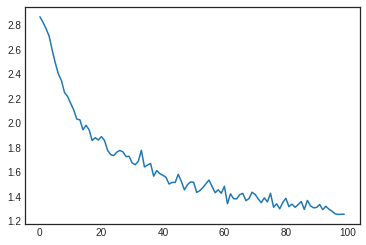

In [56]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.style.use('seaborn-white')

plt.figure()
plt.plot(all_losses)
plt.show()



# 모델 테스트

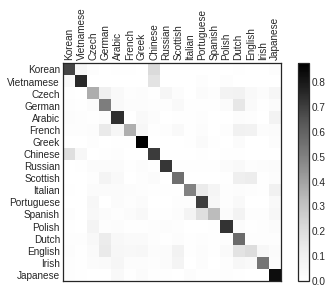

In [59]:
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 100000

def evaluate(line_tensor):
  hidden = rnn.initHidden()

  for i in range(line_tensor.size()[0]):
    output, hidden = rnn(line_tensor[i], hidden)

  return output

for i in range(n_confusion):
  category, line, category_tensor, line_tensor = randomTrainingExample()
  output = evaluate(line_tensor)
  guess, guess_i = categoryFromOutput(output)
  category_i = all_categories.index(category)
  confusion[category_i][guess_i] += 1 

for i in range(n_categories):
  confusion[i] = confusion[i] / confusion[i].sum()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

# 사용자 입력으로부터 실행하기

In [66]:
def predict(input_line, n_predictions=3):
  print('\n > %s' % input_line)
  with torch.no_grad():
    output = evaluate(lineToTensor(input_line))

    topv, topi = output.topk(n_predictions, 1, True)
    predictions = []

    for i in range(n_predictions):
      value = topv[0][i].item()
      category_index = topi[0][i].item()
      print('(%.2f %s' % (value, all_categories[category_index]))
      predictions.append([value, all_categories[category_index]])

predict('Jackson')
predict('Bill')
predict('Dovesky')
predict('Nanon')


 > Jackson
(-1.03 Scottish
(-1.09 English
(-2.21 Russian

 > Bill
(-1.55 English
(-1.62 Irish
(-2.11 Scottish

 > Dovesky
(-0.56 Russian
(-1.09 Czech
(-3.04 English

 > Nanon
(-0.94 Arabic
(-1.63 Irish
(-2.34 English
